In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

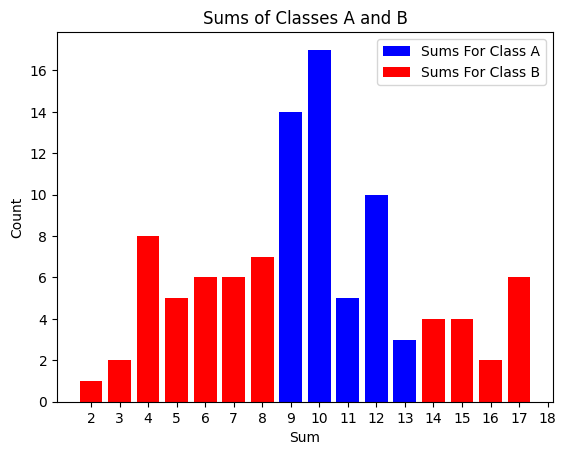

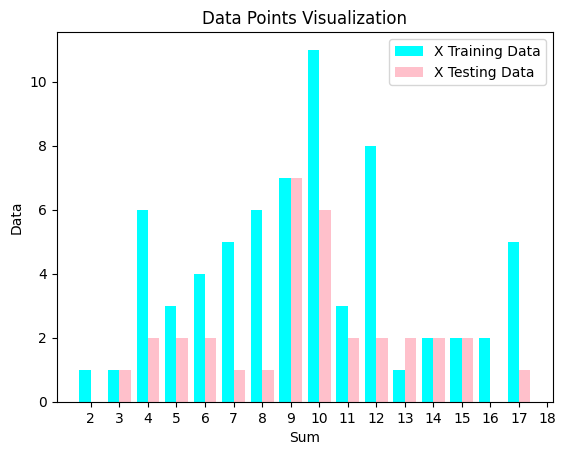

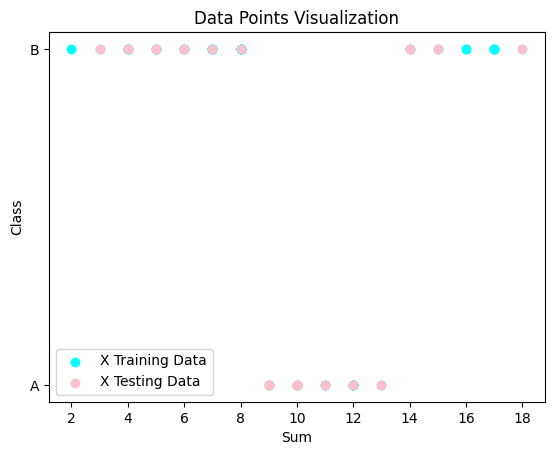

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Illustrating data for n = 1
[[19  0]
 [ 0 14]]
Predicted labels for n = 1: ['B' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B'
 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'B']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Illustrating data for n = 3
[[19  0]
 [ 0 14]]
Predicted labels for n = 3: ['B' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B'
 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'B']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Illustrating data for n = 5
[[19  0]
 [ 0 14]]
Predicted labels for n = 5: ['B' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B'
 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'B']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [377]:
#Question 1 + 2


class question_1:
    def __init__(self) -> None:
        self.list_of_tuples = []
        self.class_a = []
        self.class_b = []
        self.sum_class_a = []
        self.sum_class_b = []
        self.create_tuples()
        self.sort_tuples()
        self.draw_data()
        self.lets_split()
        self.knns()

    def create_tuples(self) -> None:
        for _ in range(100):
            self.list_of_tuples.append(tuple(np.random.randint(1,10, size=2)))

    def sort_tuples(self) -> None:

        for i in range(len(self.list_of_tuples)):
            if sum(self.list_of_tuples[i]) >= 9 and sum(self.list_of_tuples[i]) <= 13:
                self.class_a.append(self.list_of_tuples[i])
                self.sum_class_a.append(sum(self.list_of_tuples[i]))
                continue
            self.class_b.append(self.list_of_tuples[i])
            self.sum_class_b.append(sum(self.list_of_tuples[i]))


            
    def draw_data(self) -> None:
        
        all_sums = self.sum_class_a + self.sum_class_b
        
        
        bin_width = 1
        
        
        min_value = min(all_sums)
        max_value = max(all_sums)
        bin_range = range(min_value, max_value + bin_width, bin_width)
        
        
        plt.hist(self.sum_class_a, bins=bin_range, rwidth=0.8, label='Sums For Class A', color='blue')
        plt.hist(self.sum_class_b, bins=bin_range, rwidth=0.8, label='Sums For Class B', color='red')
        
        
        plt.title('Sums of Classes A and B')
        plt.xlabel('Sum')
        plt.ylabel('Count')
        
        plt.xticks(np.arange(min_value, max_value + 1, bin_width) + bin_width / 2, np.arange(min_value, max_value + 1, bin_width))
        
        
        plt.legend()
        plt.show()



    def lets_split(self):
        X,y = np.array(self.sum_class_a + self.sum_class_b), [*len(self.sum_class_a)*'A', *len(self.sum_class_b)*'B']
        


        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X,y, test_size=0.33, random_state=42)
        X_min_value = min(min(self.X_train), min(self.X_test))
        X_max_value = max(max(self.X_train), max(self.X_test))
        bin_width = 1
        X_bin_range = range(X_min_value, X_max_value + bin_width, bin_width)
        
        
        plt.figure()
        plt.hist([self.X_train, self.X_test], bins = X_bin_range, color=['cyan','pink'],label=['X Training Data', 'X Testing Data'], rwidth=0.8)
        plt.xticks(np.arange(X_min_value, X_max_value + 1, bin_width) + bin_width / 2, np.arange(X_min_value, X_max_value + 1, bin_width))

        plt.xlabel('Sum')
        plt.ylabel('Data')
        plt.title('Data Points Visualization')
        plt.legend()


        plt.figure()
        plt.scatter(self.X_train, self.y_train, c='cyan', label='X Training Data')
        plt.scatter(self.X_test, self.y_test, c='pink', label='X Testing Data')

        plt.xlabel('Sum')
        plt.ylabel('Class')
        plt.title('Data Points Visualization')
        plt.legend()


        plt.show()

    def knns(self, nums=[1,3,5,7, 20, 67]):
        for n in nums:
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(f'Illustrating data for n = {n}')
            neigh = KNeighborsClassifier(n)
            X_train_reshaped = self.X_train.reshape(-1, 1)
            neigh.fit(X_train_reshaped,self.y_train)

            X_test_reshaped = self.X_test.reshape(-1, 1)
            predictions = neigh.predict(X_test_reshaped)


            cm = confusion_matrix(self.y_test, predictions)
            print(cm)
            print(f"Predicted labels for n = {n}: {predictions}")
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')






ansr = question_1()

Question 3

Was heißt Overfitting? Was bedeutet Underfitting? Erläutern Sie
die Begriffe anhand eines eigenen, einfachen Beispiels!

When a system is overfit, it means it basically memorized the train set too well, to the point that when presented with a new test set, it would massively underperform. Underfitting is when a system is unable to find any relationships between the features, making it underperform on the test and train set.


Untersuchen Sie die MNIST Datenbank! Wie werden die
handschriftlichen Ziffern repräsentiert?

MNIST dataset is the "Hello World!" of Computer Vision, ML and Deep learning. It consists of numbers written on a grayscale canvas (28x28) the pixels that are darker in color are closer to 0, and if it is lighter in color it means it is closer to 255.


Was ist die Grundidee der linearen Regression?

The basic idea of linear regression is to find a straight line that best fits the relationship between two variables. It assumes that there is a linear relationship between the independent variable(s) and the dependent variable. By estimating the coefficients of the line, we can predict the values of the dependent variable based on the independent variable(s). The goal is to minimize the difference between the predicted values and the actual values. Linear regression can be used to make predictions, understand relationships between variables, and analyze trends in data.


Warum wird eine zufällige Verteilung von Trainingsdaten
ausgeschlossen?

Random distribution of training data is not typically excluded. In fact, randomness is often used when training machine learning models. Randomizing the order of training data helps avoid any biases or patterns in the data from affecting the model's learning process. However, it's important to ensure that the training data represents the problem accurately. It should include a variety of examples and cover different possibilities to help the model learn well. (z.B Stocks or anything that has to do with time, randomness will not surve the purpose of learning)


Worin besteht der Unterschied zwischen der gewichteten und
der ungewichteten Minkowsky-Norm?

Unweighted Minkowski norm is like treating all the dimensions (or features) equally. It doesn't consider any differences in importance between them. It's like giving each dimension the same importance when calculating the distance.
On the other hand, weighted Minkowski norm takes into account that some dimensions might be more important than others. It assigns different weights or importance levels to each dimension. So, when calculating the distance, it gives more importance to certain dimensions while downplaying the importance of others. The number of neighbors, or k, in the k-Nearest Neighbor (k-NN) algorithm affects the accuracy, simplicity and decision.


Welchen Einfluss besitzt die Anzahl der Nachbarn im k-Nearest-Neighbor-Algorithmus auf das Ergebnis?

boundary shape, handling of outliers, and computational efficiency. Smaller values of k give more accurate predictions but can be sensitive to noise. Larger values of k provide smoother predictions but may overlook important details. It's about finding the right balance for the specific problem and dataset.


Beschreiben Sie das Konzept des Entscheidungsbaumlernens!

Decision tree learning is like playing a game of questions and answers. Imagine you have a bunch of data, and you want to make decisions or predictions based on that data. A decision tree helps you do that in a simple and organized way. Starting from the top, the tree asks a question about the data. Depending on the answer, you follow the corresponding branch to the next question. This process continues until you reach a final answer or prediction at the bottom of the tree. Each question is based on a specific feature or characteristic of the data. By asking the right questions and following the branches, the decision tree learns patterns and rules from the data to help make decisions or predictions. It's like creating a step-by-step guide based on the information you have, making it easier to understand and make choices.


Auf welcher Basis findet die Attributs-Auswahl im BDT Algorithmus statt?

The eqn we discussed in class to find the effect of a feature on the output


Was bedeutet Entropie informationstheoretisch?

In information theory, entropy is a measure of how messy or uncertain something is. It tells us how much surprise or unpredictability there is in a set of information. If something is very predictable, like a repeating pattern, it has low entropy. But if something is random or chaotic, it has high entropy. So, entropy helps us understand how much information or order there is in a given situation.


Welche Rolle spielt der Informationsgewinn für die Wahl eines
geeigneten anzuwendenden Attributs?

Information gain helps in choosing the best attribute for splitting data in a decision tree. It looks for the attribute that gives us the most useful and important information to make decisions. The higher the information gain, the more valuable the attribute is for dividing the data into groups that are similar and easier to understand. So, information gain helps us pick the attribute that helps us make better decisions and get more accurate results in our decision tree.

In [378]:
# Question 4
import math



# Ia1
grun = (-3/4*math.log2(3/4) - (1/4*math.log2(1/4)))
rot = 0
Ia1 = 4/5 * grun + 1/5*rot


#Ia2
tief = (-2/3 * math.log2(2/3) - (1/3*math.log2(1/3)))
hoch = (-1/2 * math.log2(1/2) - (1/2*math.log2(1/2)))
Ia2 = 3/5*tief + 2/5*hoch

#Ia3
gross = (-2/3 * math.log2(2/3) - (1/3*math.log2(1/3)))
klein = (-1/2*math.log2(1/2) - (1/2*math.log2(1/2)))
Ia3 = 3/5*gross + 2/5*klein

#Ia4
heiss = (-1/3*math.log2(1/3) - (2/3*math.log2(2/3)))
kalt = 0
Ia4 = 3/5*heiss + 2/5*kalt

vals = dict(zip(['Ia1', 'Ia2', 'Ia3', 'Ia4'],[Ia1, Ia2, Ia3, Ia4]))
print(vals)




{'Ia1': 0.6490224995673063, 'Ia2': 0.9509775004326937, 'Ia3': 0.9509775004326937, 'Ia4': 0.5509775004326937}


In [379]:
# Question 5
class Attr:
    grun = 0
    rot = 1
    tief = 0
    hoch = 1
    gross = 0
    klein = 1
    heiss = 0
    kalt = 1


X = [
    [Attr.grun, Attr.tief, Attr.gross, Attr.heiss],
    [Attr.grun, Attr.tief, Attr.klein, Attr.heiss],
    [Attr.grun, Attr.tief, Attr.gross, Attr.kalt],
    [Attr.grun, Attr.hoch, Attr.klein, Attr.kalt],
    [Attr.rot, Attr.hoch, Attr.gross, Attr.heiss]
]


y = ['Ja',
     'Nein',
     'Ja',
     'Ja',
     'Nein']


dt = tree.DecisionTreeClassifier(criterion= 'entropy')
dt = dt.fit(X,y)


feature_names = ['Atribute 1', 'Atribute 2', 'Atribute 3', 'Atribute 4']
class_names = ['Ja', 'Nein']


graph_data = export_graphviz(dt, feature_names=feature_names, class_names=class_names, filled = True)
graph = graphviz.Source(graph_data)
graph.render('decision_tree')
graph.view()

'decision_tree.pdf'